
<div align="center">

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangtgao/DS-UA_201-Causal-Inference-Spring-2025/blob/main/labs/3-Statistics.ipynb)

</div>






$$
\begin{array}{c}
\textbf{CAUSAL INFERENCE}\\\\
\textbf{Zichao Zhang} \\
\textit{Center for Data Science, New York University} \\\\
\textit{Sep 19, 2025}\\\\\\
\text{Materials prepared by: Daniela Pinto Veizaga, Xiang Pan, Xiang Gao,and Zichao Zhang}
\end{array}
$$

---

## Goals for today


- Probability: Conditional Variance and Independence
- Revisiting All Causes Model
- Statistics: Estimators, Bias/Variance, Consistency, WLLN, and CLT
---



In [68]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import scipy.stats as stats
from IPython.display import display, Math

## Probability

### Conditional Variance


\begin{align}
 \text{Var}(Y|X) &= E[(Y - E[Y|X])^2 | X] \\
 &= E[Y^2|X] - (E[Y|X])^2
\end{align}



**Question:** Given $Y = 2X + \varepsilon$ and $\varepsilon \sim \mathcal{N}(0,1)$ independent of $X$, what do you expect for $\operatorname{Var}(Y \mid X = x)$?

  Let's go through some simulations!

In [99]:
# Step 1: Generate synthetic data for (X, Y) pairs
np.random.seed(201)
X = np.random.randint(1, 6, size=100000)  # Random values for X
epsilon = np.random.normal(0, 1, 100000)  # Noise
Y = 2 * X + epsilon  # Y depends on X with some noise

# Step 2: Compute Conditional Expectation
def conditional_expectation(Y, X, value):
    return np.mean(Y[X == value])

# Step 3: Compute Conditional Variance
def conditional_variance(Y, X, value):
    E_Y_given_X = conditional_expectation(Y, X, value)
    return np.mean((Y[X == value] - E_Y_given_X)**2)

# Test conditional variance for specific values of X (e.g., X = 3)
values = [1, 2, 3, 4, 5]
for value in values:
  cond_var = conditional_variance(Y, X, value)
  print(f"Conditional Variance of Y given X = {value}: {cond_var}")

Conditional Variance of Y given X = 1: 0.9864087183889062
Conditional Variance of Y given X = 2: 1.004152401911565
Conditional Variance of Y given X = 3: 0.9940443248132618
Conditional Variance of Y given X = 4: 0.9942036610361634
Conditional Variance of Y given X = 5: 1.0089530624633944


In [100]:
# Alternative form of the conditional variance
def conditional_variance_alt(Y, X, value):
    return np.mean(Y[X == value]**2) - np.mean(Y[X == value])**2

# Test conditional variance for specific values of X (e.g., X = 3)
values = [1, 2, 3, 4, 5]
for value in values:
  cond_var = conditional_variance(Y, X, value)
  print(f"Conditional Variance of Y given X = {value}: {cond_var}")

Conditional Variance of Y given X = 1: 0.9864087183889062
Conditional Variance of Y given X = 2: 1.004152401911565
Conditional Variance of Y given X = 3: 0.9940443248132618
Conditional Variance of Y given X = 4: 0.9942036610361634
Conditional Variance of Y given X = 5: 1.0089530624633944


**Answer:** It should be $1$ for every $x$.

Reason:
$$
\operatorname{Var}(Y \mid X=x)
= \operatorname{Var}(2x+\varepsilon \mid X=x)
= \operatorname{Var}(\varepsilon)
= 1.
$$


**Why the estimates aren’t exactly 1.** We are estimating from finite data, so each $\widehat{\operatorname{Var}}(Y\mid X=x)$ has sampling error (we also subtract the sample conditional mean). With $N \approx 100{,}000$ total points (about $n_{\text{group}}\approx 20{,}000$ per $x$), the error is on the order of $O!\big(n_{\text{group}}^{-1/2}\big)$. For Normal data,
$$
\mathrm{sd}!\big(\hat{\sigma}^2\big);\approx; \sigma^2 \sqrt{\frac{2}{,n_{\text{group}}-1,}}, .
$$
Hence values like $0.99$ or $1.01$ are expected; by the Law of Large Numbers, $\widehat{\operatorname{Var}}(Y\mid X=x)\to 1$ as $n_{\text{group}}\to\infty$.

### Independence

$$
P(X \in A, Y \in B) = P(X \in A)P(Y \in B)
$$

Also,

$$
P(Y|X) = P(Y) \ \ \text{and} \ \ P(X|Y) = P(X)
$$

If two variables are independent, then knowing the value of one variable does not provide additional information about the other.

It is also the case that independent variables have a covariance of 0 and are, therefore, uncorrelated.
- Proof in lecture slides by showing

$$\mathbb{E}[XY]=\mathbb{E}[X]\mathbb{E}[Y]$$

Let's go through some simulations!

In [71]:
# Step 1: Simulate independent random variables
np.random.seed(201)
X_ind = np.random.randint(1, 7, 1000)  # Roll of die 1
Y_ind = np.random.randint(1, 7, 1000)  # Roll of die 2

# Step 2: Calculate covariance of independent variables
cov_ind = np.cov(X_ind, Y_ind)[0, 1]
print(f"Covariance of independent variables: {cov_ind}")

# Step 3: Simulate dependent variables
X_dep = np.random.randint(1, 10, 1000)
Y_dep = 2 * X_dep + np.random.normal(0, 1, 1000)

# Calculate covariance of dependent variables
cov_dep = np.cov(X_dep, Y_dep)[0, 1]
print(f"Covariance of dependent variables: {cov_dep}")

Covariance of independent variables: -0.09712712712712726
Covariance of dependent variables: 12.79841617712051


We see that in the independent case the covariance is very close to 0 (as expected, it should approach 0 as we increase sample size). In the dependent case, we get a large covariance (indicating strong linear association since $Y$ was defined to depend on $X$). This confirms that independence implies zero covariance/uncorrelatedness.

However, the converse statement is false. Independence is not necessary for uncorrelatedness.

Now, to disprove the converse, we provide an example of two variables that are uncorrelated (covariance 0) but not independent:


Uncorrelated but Dependent Example: Let’s define:
	•	$X$ uniformly distributed in [-1, 1].
	•	$Y = X^2$.

Here $Y$ is completely determined by $X$ (so they’re definitely dependent!), yet $X$ and $Y$ will be uncorrelated:
	•	$E[X] = 0$ (symmetry around 0),
	•	$E[Y] = E[X^2] > 0$,
	•	$E[XY] = E[X \cdot X^2] = E[X^3] = 0$ (again by symmetry, since $X^3$ is an odd function around 0).

Thus $\text{Cov}(X,Y) = E[XY] - E[X]E[Y] = 0 - (0)(E[Y]) = 0$ despite $Y = f(X)$.

We simulate this to verify the covariance is ~0 and plot the relationship:


Covariance between X and Y: -5.442179332610363e-06


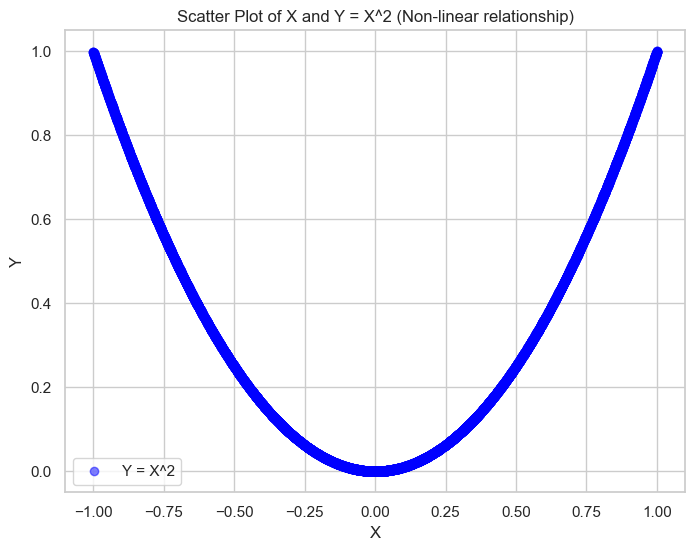

In [72]:
# Generate X uniformly from [-1, 1]
np.random.seed(201)
X = np.random.uniform(-1, 1, 10000)

# Define Y as X^2
Y = X**2

# Calculate covariance
cov_XY = np.cov(X, Y)[0, 1]
print(f"Covariance between X and Y: {cov_XY}")

# Create a scatter plot to visualize the relationship between X and Y
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', alpha=0.5, label='Y = X^2')
plt.title('Scatter Plot of X and Y = X^2 (Non-linear relationship)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.show()

The printed covariance is essentially 0 (-5.44e-6). Yet the scatterplot shows a clear U-shaped curve: $Y$ increases with $|X|$, implying $X$ and $Y$ are not independent (knowing $X$ definitely tells you something about $Y = X^2$). This example underscores that zero correlation does not guarantee independence.

See examples (dependent but uncorrelated) from the third row in the following picture.

![Indep](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/800px-Correlation_examples2.svg.png)

## Revisiting All Causes Model

Now we shift to the causal inference context with the “All Causes Model.” In this framework, we express an outcome Y as a function of:


	•	S: the state or treatment of interest (e.g. whether a person went to college, received a drug, etc.), and

	•	U: the set of other factors (usually unobserved or not controlled) that also influence Y.

We write $Y = Y(S, U)$ to emphasize $Y$ can depend on both. For simplicity, consider $S$ as a binary treatment ($S=1$ for treated, $S=0$ for control).

We are interested in various causal estimates:
$$
\begin{align*}
\text{ATE} &= E\big[,Y(S=1, U) - Y(S=0, U),\big], \\
\text{ATT} &= E\big[,Y(S=1, U) - Y(S=0, U),\mid S=1\big], \\
\text{ATU} &= E\big[,Y(S=1, U) - Y(S=0, U),\mid S=0\big]~,
\end{align*}
$$
	•	ATE (Average Treatment Effect): the average causal effect of S on Y in the population – i.e. how much, on average, Y would change if everyone went from S=0 to S=1.
	•	ATT (Effect on the Treated): the average effect of S on Y for those who actually received the treatment (S=1 group).
	•	ATU (Effect on the Untreated): the average effect if those who did not get the treatment (S=0 group) were hypothetically given the treatment.

These quantities might differ if the treated and untreated populations have different characteristics $U$ (which often happens due to confounding).

### Simulation

Using the same example from lecture, we will show how computing only association based on observational data does not give us the true underlying causal effect.

- $Y$ is continuous income.
- $S$ is binary college status. (1 = went to college)
- $U$ is binary family status. (1 = wealthy family)

We can see that the true causal effect from college status to income of people will be confounded by the third variable on family status as it is a common cause of both the treatment and outcome, i.e., a wealthy family leads to higher income and more likely to go to college.

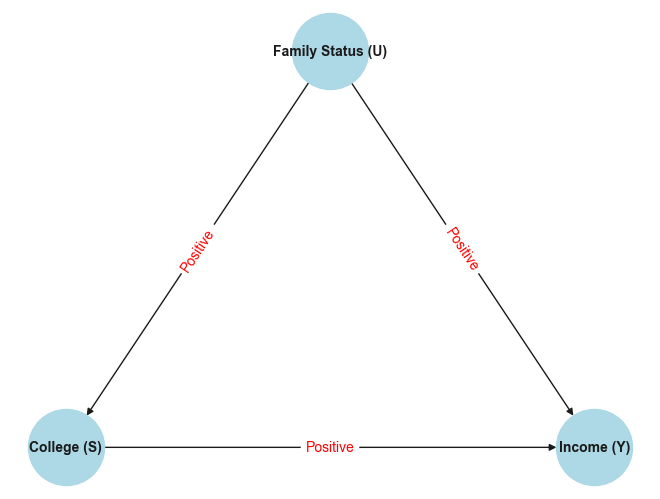

In [106]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_node("Family Status (U)")
G.add_node("College (S)")
G.add_node("Income (Y)")

# Add directed edges representing causal relationships
G.add_edge("Family Status (U)", "College (S)")
G.add_edge("Family Status (U)", "Income (Y)")
G.add_edge("College (S)", "Income (Y)")

# Draw the graph
pos = {
    "Family Status (U)": (0, 1),
    "College (S)": (-1, 0),
    "Income (Y)": (1, 0),
}

labels = {
    ("Family Status (U)", "College (S)"): "Positive",
    ("Family Status (U)", "Income (Y)"): "Positive",
    ("College (S)", "Income (Y)"): "Positive",
}

nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color="red")
plt.show()

Now, let's generate some sythetic data corresponding to this data generative process.

In [107]:
# Step 1: Simulate family status (rich=1, poor=0)
np.random.seed(42)
n = 1000
family_status = np.random.binomial(1, 0.4, n)  # 40% rich, 60% poor

# Step 2: Simulate college attendance based on family status (rich more likely to attend college)
college = np.random.binomial(1, 0.7 * family_status + 0.3 * (1 - family_status), n)

# Step 3: Simulate income based on family status and college attendance
'''
	•	Baseline income = $50,000.
	•	College ($S=1$) adds $30,000 on average to income (this is the causal effect of college in our model).
	•	Coming from a wealthy family ($U=1$) adds $20,000 to income (regardless of college).
'''
noise = np.random.normal(0, 5000, n)  # Noise to add to income
income_observe = (50000 + 30000 * college + 20000 * family_status + noise)
income_college = (50000 + 30000 * 1 + 20000 * family_status + noise)

# For people who went to college (treated group), compared to the untreated,
# they would have higher income in the counterfactual world where they did not go to college
income_no_college = (50000 + 30000 * 0 + 10000 * college + 20000 * family_status + noise)

# Create a DataFrame for clarity
df = pd.DataFrame({
    'Family_Status': family_status,  # 1 = rich, 0 = poor
    'College': college,  # 1 = went to college, 0 = did not go to college
    'Income_Observe': income_observe,
    'Income_College': income_college,
    'Income_No_College': income_no_college
})

We can calculate the true ATE, ATT, and ATU based on the perfect knowledge we have on the observed and conuterfactual outcomes.

In [108]:
# Step 4: Compute ATE, ATT, ATU
# TRUE ATE:
ATE = df['Income_College'].mean() - df['Income_No_College'].mean()

# ATT:
ATT = df[(df['College'] == 1)]['Income_College'].mean() - df[(df['College'] == 1)]['Income_No_College'].mean()

# ATU:
ATU = df[(df['College'] == 0)]['Income_College'].mean() - df[(df['College'] == 0)]['Income_No_College'].mean()

# Print the results
print(f"TRUE Average Treatment Effect (ATE): {ATE:.2f}")
print(f"TRUE Average Treatment Effect on the Treated (ATT): {ATT:.2f}")
print(f"TRUE Average Treatment Effect on the Untreated (ATU): {ATU:.2f}")

TRUE Average Treatment Effect (ATE): 25560.00
TRUE Average Treatment Effect on the Treated (ATT): 20000.00
TRUE Average Treatment Effect on the Untreated (ATU): 30000.00


These are the true causal effects in our synthetic world. In reality, we’d never know these exactly because we can’t see both outcomes for anyone.
What happens if we only have access to the observed treatment and outcome with hidden confounding?

In [109]:
# Step 5: Compute association by conditioning
# Biased ATE using only what was obserevd:
Association = df[df['College'] == 1]['Income_Observe'].mean() - df[df['College'] == 0]['Income_Observe'].mean()
# Print the results
print(f"Biased Average Treatment Effect (ATE): {Association:.2f}")

Biased Average Treatment Effect (ATE): 37639.89


This ‘Association’ is just the raw difference E[Y∣S=1]−E[Y∣S=0]; it ignores 𝑈, so it mixes the college effect with wealth differences — hence it’s biased.”

If we have access to potential confounders, we can condition them. (More on this in later lectures)

In [110]:
# Step 6: Condition on confounder - family status

Association = df[(df['College'] == 1) & (df['Family_Status'] == 1)]['Income_Observe'].mean() - df[(df['College'] == 0) & (df['Family_Status'] == 1)]['Income_Observe'].mean()

# Print the results
print(f"Association for those with family_status = 1: {Association:.2f}")

Association = df[(df['College'] == 1) & (df['Family_Status'] == 0)]['Income_Observe'].mean() - df[(df['College'] == 0) & (df['Family_Status'] == 0)]['Income_Observe'].mean()

# Print the results
print(f"Association for those with family_status = 0: {Association:.2f}")

Association for those with family_status = 1: 30553.75
Association for those with family_status = 0: 30308.08


## Statistics

###  Statistics v.s. Probability



Suppose that $X_1, ..., X_n$ are independent random variables with some cdf $F$.

**Probability**: $F$ is known and we can (in theory) calculate probabilities involving the random variables $X_1, ..., X_n$, e.g., $P(a \leq \bar{X} \leq b)$.
- Knowledge of the population (i.e. F) gives us information about the nature of the samples from that population.

**Statistics**: $F$ is unknown and we observe outcomes of the random variables $x_1, ..., x_n$.
- We use the information in the data to estimate or infer properties of the unknown distribution $F$.


### Means of Gaussian Distributions

A Gaussian random variable has the following probability density function with two parameters:

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma}} \exp \left( -\frac{(x - \mu)^2}{2\sigma^2} \right)
$$

Given i.i.d samples $x_1, ..., x_n$ from a Gaussian distribution, we would like to estimate the mean of the distribution.

A good estimator $\hat{\mu}_n$ for the mean of Gaussian is the sample mean $
\hat{\mu}_n = \frac{1}{n} \sum_{i=1}^{n} x_i
$.

This is intuitive, and you can show this via maximum likelihood estimation.

In [78]:
# Step 1: Generate a sample of n data points from a Gaussian distribution
np.random.seed(42)
n = 1000
true_mu = 5  # True population mean
true_sigma = 2  # True population standard deviation
data = np.random.normal(loc=true_mu, scale=true_sigma, size=n)

# Step 2: Calculate the sample mean
sample_mean = np.mean(data)
print(f"Sample Mean: {sample_mean}")

# Step 3: Simulate multiple samples to show unbiasedness
num_simulations = 1000
sample_means = [np.mean(np.random.normal(true_mu, true_sigma, n)) for _ in range(num_simulations)]
print(f"Average of Sample Means (across simulations): {np.mean(sample_means)}")

Sample Mean: 5.0386641116446516
Average of Sample Means (across simulations): 4.996833232634605


This is an unbiased estimator for $\mu$, i.e., the expected value of the sample mean equals the true mean.

$$
\text{Bias}(\hat{\mu}_n) = E[\hat{\mu}_n] - \mu = 0
$$

Also, the variance of the sample mean is simply the variance of the Gaussian divide by the sample size (the sample mean gets close to the true mean as we increase sample size).

$$
\text{Var}(\hat{\mu}_n) = \frac{\sigma^2}{n}
$$

See lecture slides for proofs.

In [79]:
# Step 4: Calculate the bias of the sample mean
bias = np.mean(sample_means) - true_mu
print(f"Bias of the Sample Mean: {bias}")

# Step 5: Calculate the variance of the sample mean
variance = np.var(sample_means)
print(f"Variance of the Sample Mean: {variance}")

# Theoretical variance of the sample mean for Gaussian distribution
theoretical_variance = (true_sigma ** 2) / n
print(f"Theoretical Variance: {theoretical_variance}")

Bias of the Sample Mean: -0.0031667673653945627
Variance of the Sample Mean: 0.004145252787930504
Theoretical Variance: 0.004


This estimator is also consistent based on the Weak Law of Large Number (WLLN).

$$
\lim_{n \to \infty} P\left( |\overline{X}_n - \mu| > \epsilon \right) = 0
$$

“As the sample size 𝑛 gets large, the sample mean μ will be close to the true mean μ with high probability.”

Sample Means for different sizes: [4.710905546907496, 5.414024467021665, 4.782722755544523, 4.567195741630209, 5.000857451210413, 5.077863617662095, 5.019700795749149, 5.026006940904063, 5.002327783361207, 4.997753484426097]


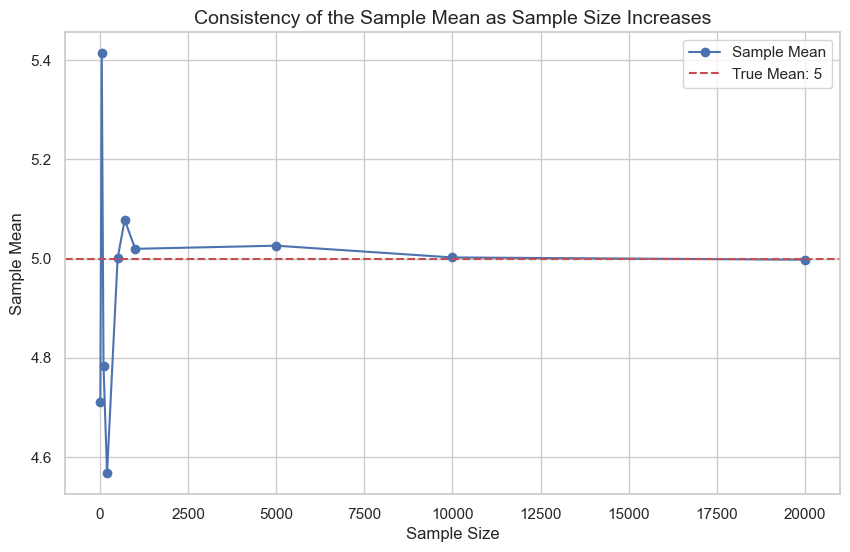

In [80]:
# Simulate increasing sample sizes and calculate the sample mean for each size
np.random.seed(201)
sample_sizes = [10, 50, 100, 200, 500, 700, 1000, 5000, 10000, 20000]
means = []

for size in sample_sizes:
    sample = np.random.normal(loc=true_mu, scale=true_sigma, size=size)
    means.append(np.mean(sample))

print(f"Sample Means for different sizes: {means}")

plt.figure(figsize=(10, 6))

# Plot the sample means for each sample size
plt.plot(sample_sizes, means, marker='o', linestyle='-', label='Sample Mean')

# Add horizontal line for the true mean
plt.axhline(y=true_mu, color='r', linestyle='--', label=f'True Mean: {true_mu}')

# Add labels and title
plt.title('Consistency of the Sample Mean as Sample Size Increases', fontsize=14)
plt.xlabel('Sample Size', fontsize=12)
plt.ylabel('Sample Mean', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()

Central Limit Theorem (CLT) states that for large $n$:

$$
\hat{\mu}_n \sim N\left(\mu, \frac{\sigma^2}{n}\right)
$$

For large 𝑛, the distribution of the sample mean is approximately Normal, centered at μ, with variance 𝜎^2/𝑛 — even if the raw data aren’t Normal.

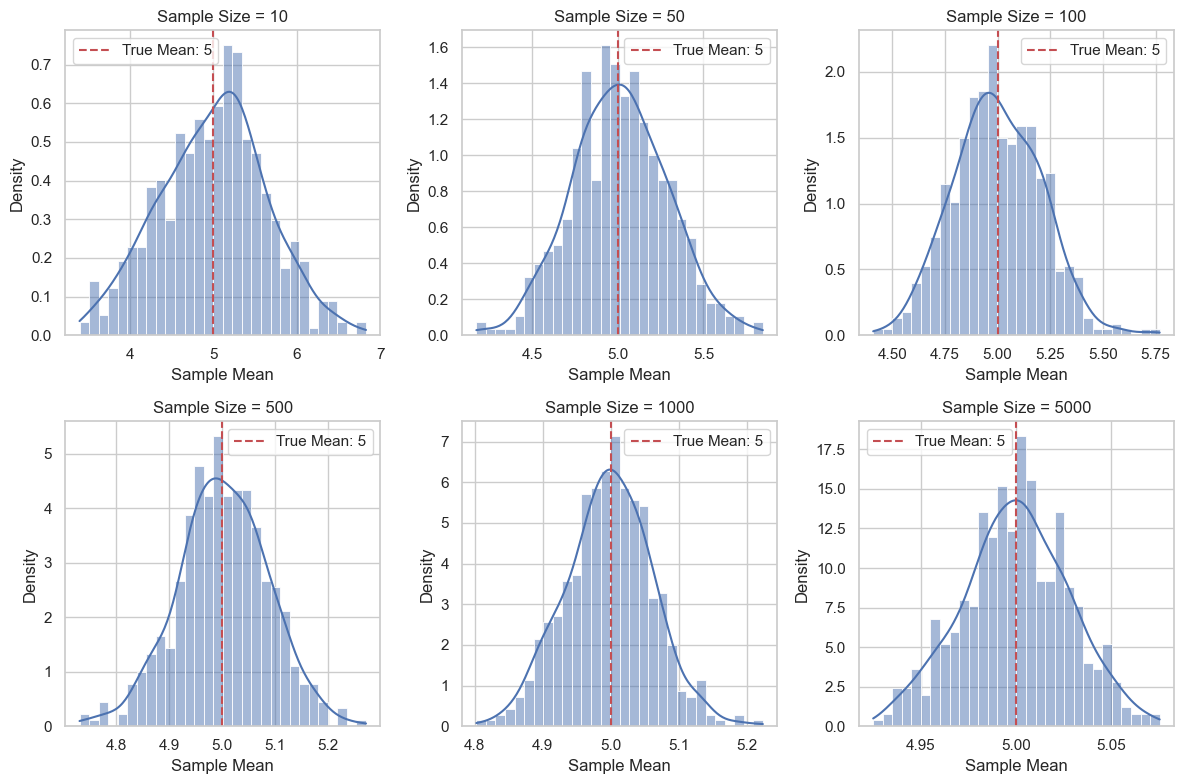

In [81]:
n_trials = [10, 50, 100, 500, 1000, 5000]  # Sample sizes
num_simulations = 500  # Number of simulations to estimate the distribution of the sample mean

# Generate sample means for different sample sizes
sample_means_dict = {}

for n in n_trials:
    sample_means = [np.mean(np.random.normal(true_mu, true_sigma, n)) for _ in range(num_simulations)]
    sample_means_dict[n] = sample_means

# Plot histograms of the sample means for different sample sizes
plt.figure(figsize=(12, 8))

for i, n in enumerate(n_trials, 1):
    plt.subplot(2, 3, i)
    sns.histplot(sample_means_dict[n], bins=30, kde=True, stat="density")
    plt.title(f'Sample Size = {n}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.axvline(x=true_mu, color='r', linestyle='--', label=f'True Mean: {true_mu}')
    plt.legend()

plt.tight_layout()
plt.show()

The real power of CLT comes from the fact that the original samples can come from a potentially unknown and very complex data distribution.

Central Limit Theorem with non-Gaussian Data

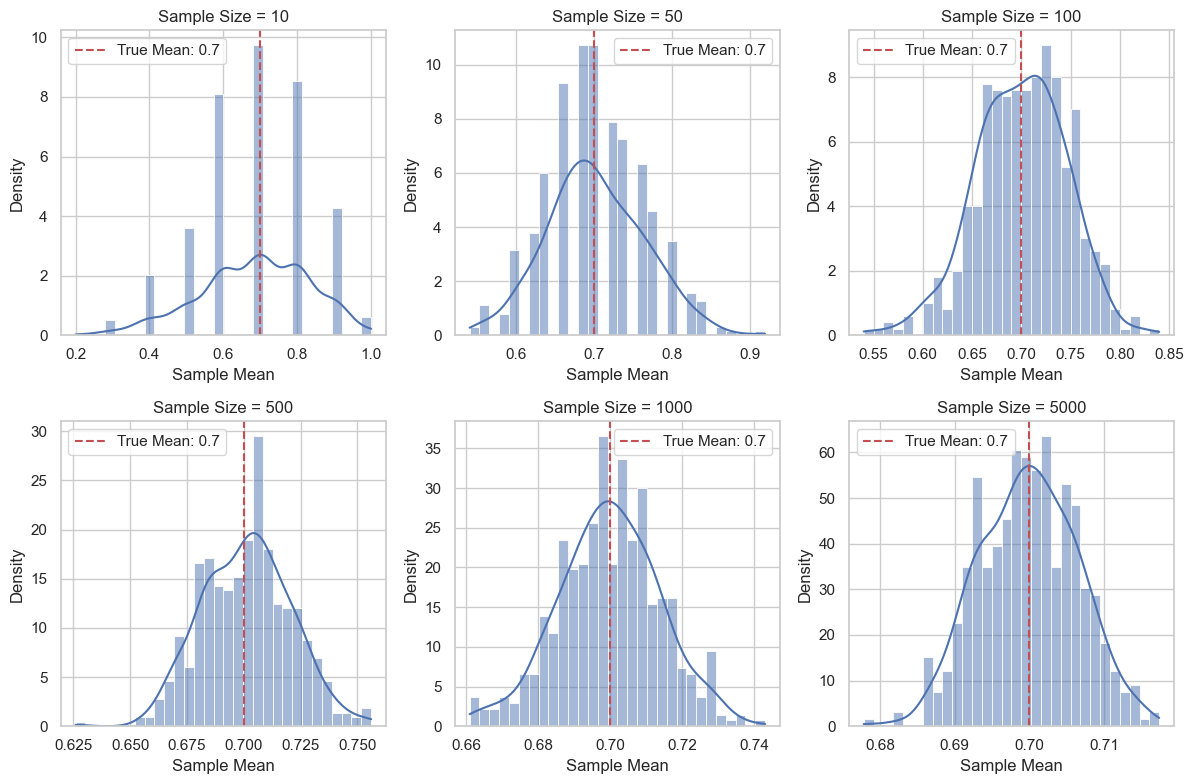

In [82]:
# Set Bernoulli distribution parameter
p = 0.7  # Probability of success
true_mu = p  # The true mean of the Bernoulli distribution
n_trials = [10, 50, 100, 500, 1000, 5000]  # Sample sizes
num_simulations = 500  # Number of simulations to estimate the distribution of the sample mean

# Step 1: Generate sample means for different sample sizes
sample_means_dict = {}

for n in n_trials:
    sample_means = [np.mean(np.random.binomial(1, p, n)) for _ in range(num_simulations)]
    sample_means_dict[n] = sample_means

# Step 2: Plot histograms of the sample means for different sample sizes
plt.figure(figsize=(12, 8))

for i, n in enumerate(n_trials, 1):
    plt.subplot(2, 3, i)
    sns.histplot(sample_means_dict[n], bins=30, kde=True, stat="density")
    plt.title(f'Sample Size = {n}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.axvline(x=true_mu, color='r', linestyle='--', label=f'True Mean: {true_mu}')
    plt.legend()

plt.tight_layout()
plt.show()